In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.layers import Dense
# import keras_tuner as kt
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import scipy.io
import cv2
import os

## Load the Dataset, visualize the data, and describe the data

### view an image

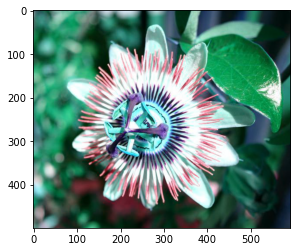

In [2]:
# the path of the image
img_path = 'dataset/102flowers/jpg/image_00001.jpg'
# Read the image
img = cv2.imread(img_path)
# show the image
plt.imshow(img)
plt.show()


In [3]:
print("image dimensions:", img.shape)
mn = np.min(img)
mx =np.max(img)
print("range: [%.4f, %.4f]" % (mn ,mx))
print("data type:",img.dtype)

image dimensions: (500, 591, 3)
range: [0.0000, 255.0000]
data type: uint8


In [4]:
# compress the image
print("image size before: ", img.shape)
# dsize
dsize = (224, 224)
# resize image
output = cv2.resize(img, dsize)
print("image size after: ", output.shape)

image size before:  (500, 591, 3)
image size after:  (224, 224, 3)


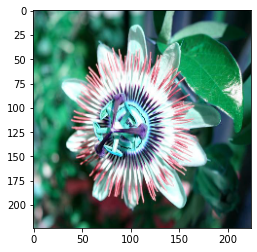

In [5]:
plt.imshow(output)
plt.show()

### Load the data

#### load the images/features and compress the images

we need to compress the images becuase the pretrained model takes an image of size up to 224 x 224 x 3 and so that the training does not take a very long time.

In [6]:
# load the features and compress the images
dsize = (224, 224)
features_path = 'dataset/102flowers/jpg'
images = os.listdir(features_path)
features = []
for img in images:
    image = cv2.imread('dataset/102flowers/jpg/'+img)
    features.append(cv2.resize(image, dsize))

In [7]:
features = np.array(features)

In [8]:
features.shape

(8189, 224, 224, 3)

In [9]:
features[0].shape

(224, 224, 3)

In [10]:
for f in features:
    if (f.shape[0] < 224 or f.shape[1] < 224):
        print("yes")

In [11]:
features_length = features.shape
features_length

(8189, 224, 224, 3)

In [12]:
for f in features:
    if (f.shape[0] != 224 or f.shape[1] != 224):
        print("yes")

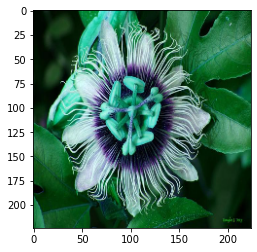

In [13]:
plt.imshow(features[200])
plt.show()

In [14]:
# uint8
for f in features:
    if(f.dtype != "uint8"):
        print("yes")

In [15]:
for f in features:
    if(np.min(f) < 0):
        print("yes")

In [16]:
for f in features:
    if(np.max(f) > 255):
        print("yes")

#### Load the labels

In [17]:
# load the labels
labels_path = 'dataset/imagelabels.mat'
labels = scipy.io.loadmat(labels_path)

In [18]:
labels

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [19]:
labels['labels'][0]

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [20]:
# labels
targets = labels['labels'][0]

In [21]:
targets.shape

(8189,)

In [22]:
len(np.unique(targets))

102

In [23]:
type(targets)

numpy.ndarray

### Data visulization

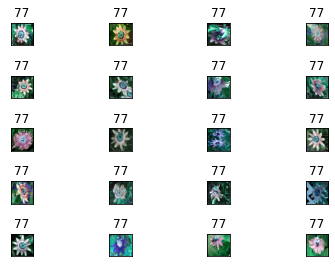

In [24]:
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.tight_layout()
    plt.imshow(features[i])
    plt.title('{}'.format(targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

C:\Users\User\anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


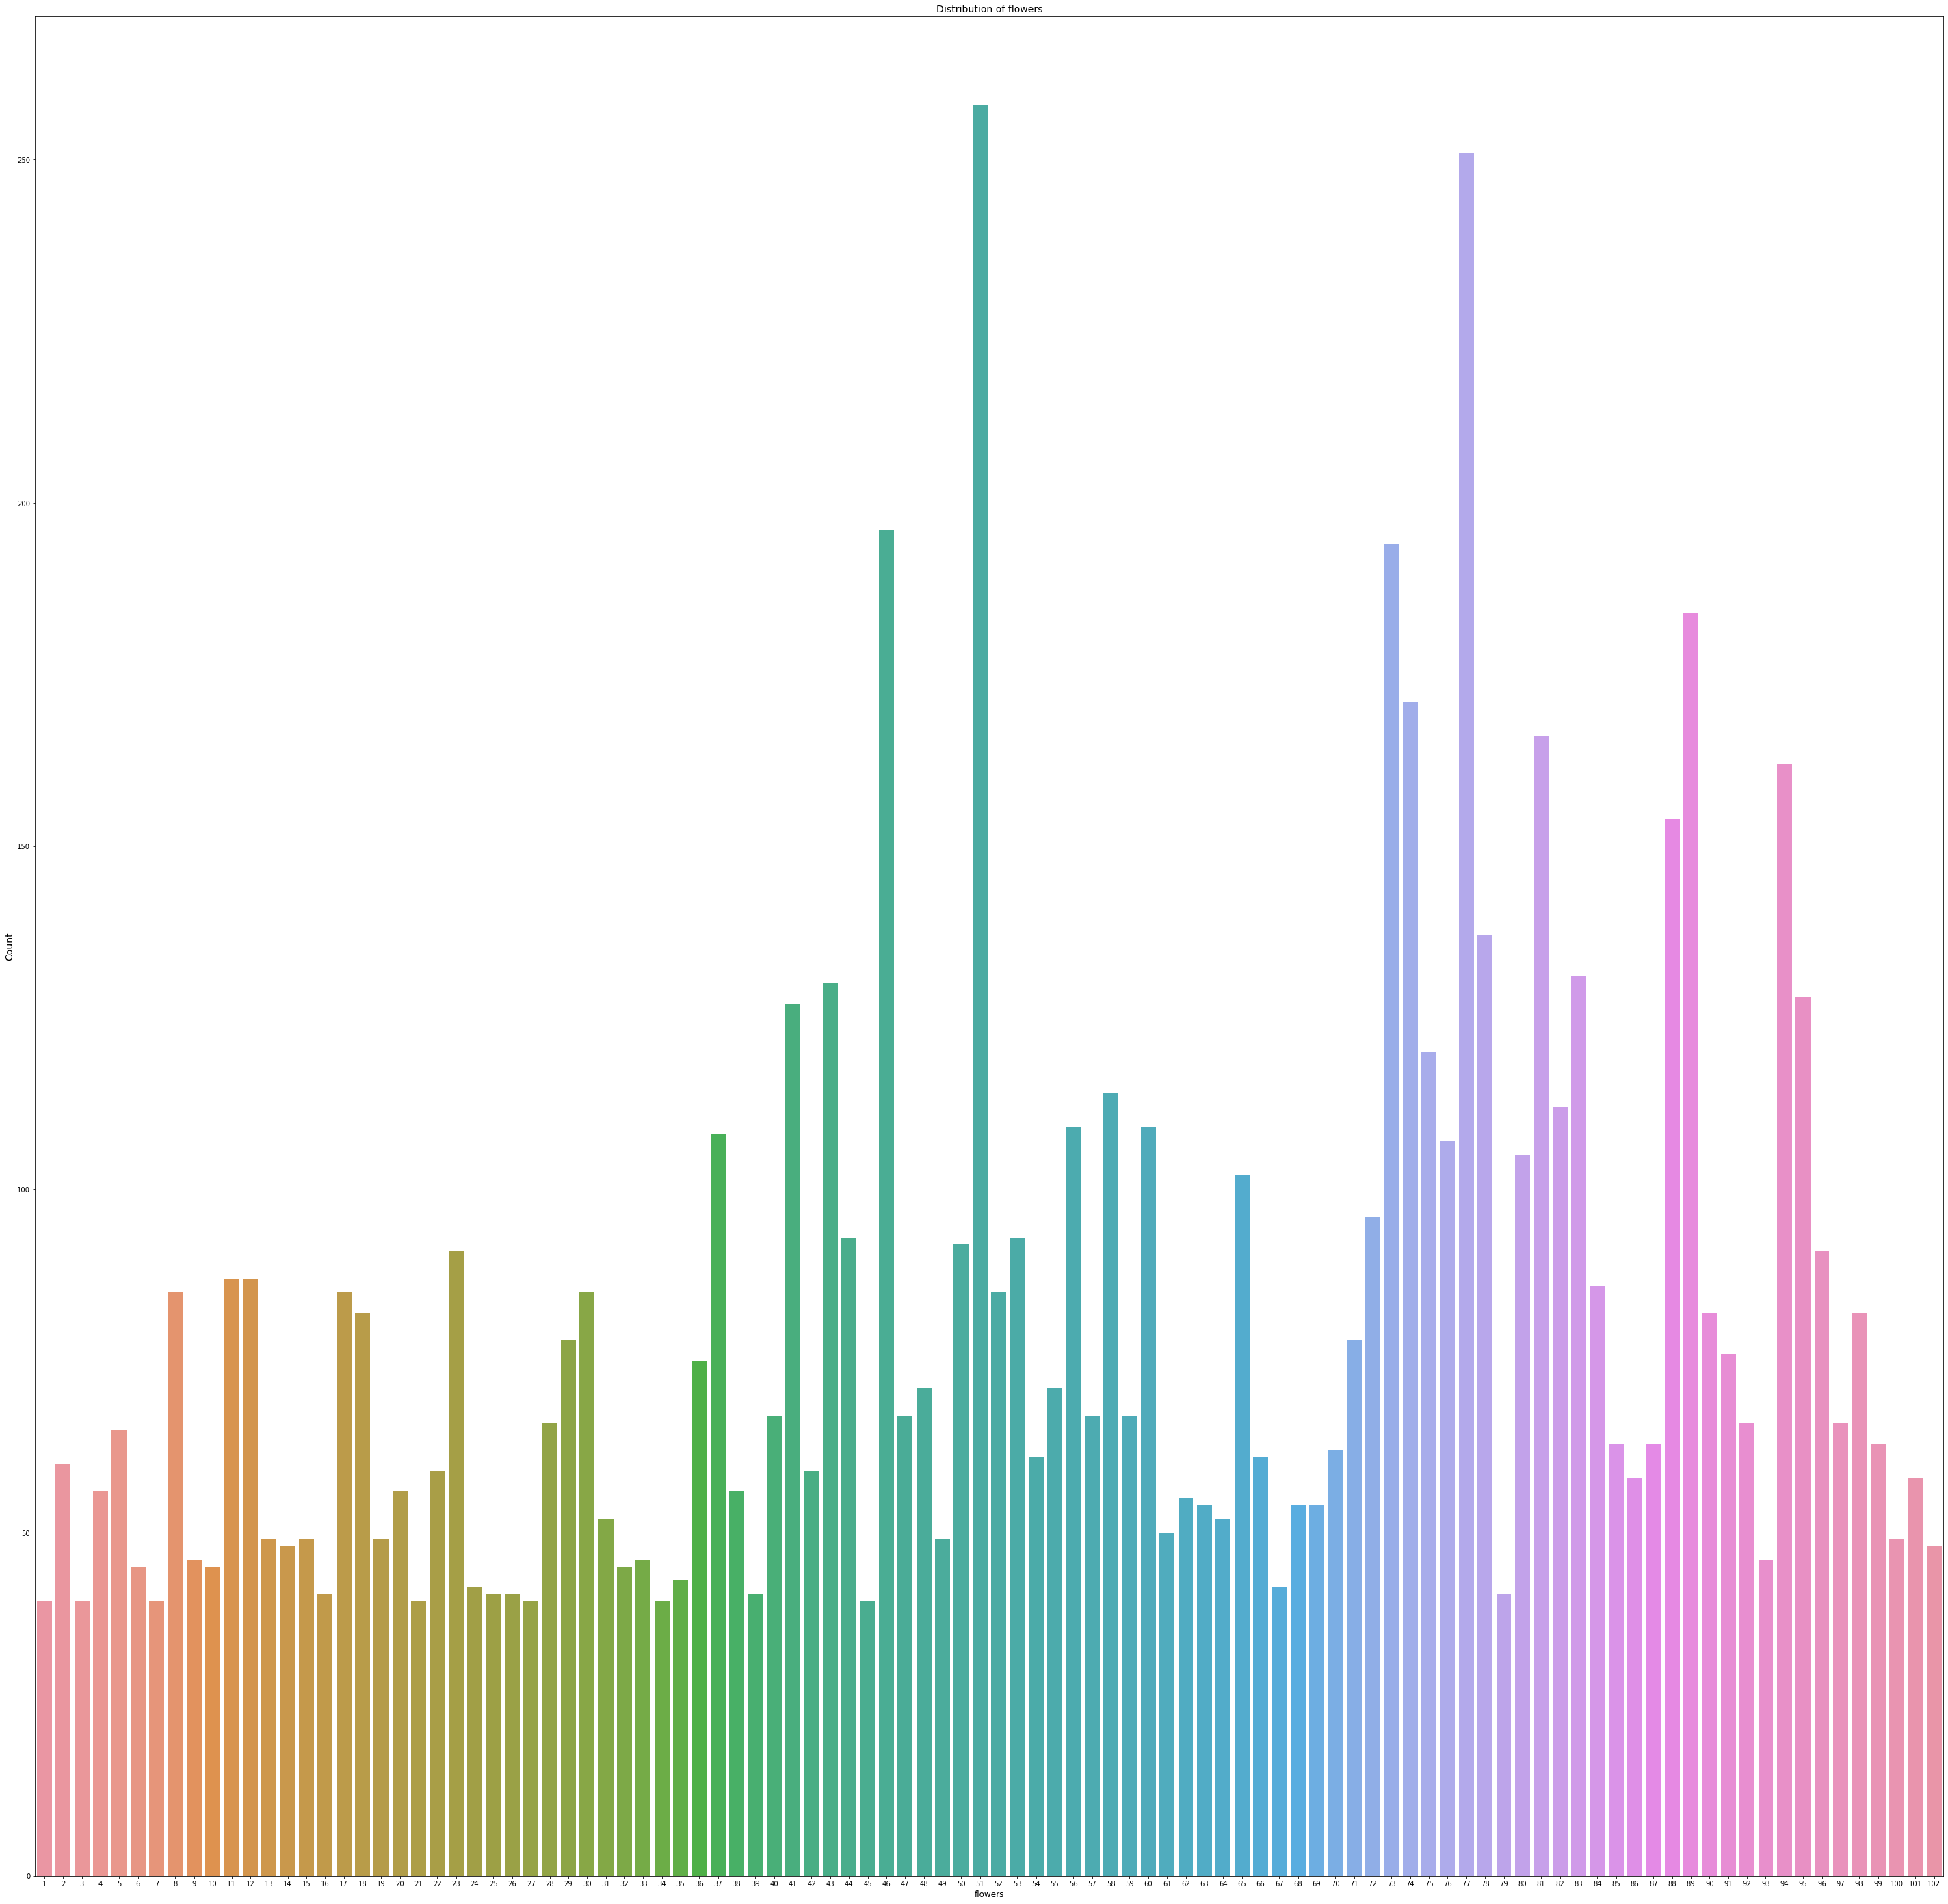

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.countplot(targets)
ax.set_title('Distribution of flowers', fontsize=14)
ax.set_xlabel('flowers', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

**not very balanced**

### Data Description

The dataset contains images of flowers belonging to 102 different categories. There are a minimum of 40 images for each category.

## Encode labels

In [26]:
(pd.get_dummies(targets).values)[0][76]

1

In [27]:
y = pd.get_dummies(targets).values

In [28]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## convert the features and targets to float32

the pretrained model need float32 to run

In [29]:
features.dtype

dtype('uint8')

In [30]:
new_features = np.asarray(features).astype(np.float32)

In [31]:
new_features.dtype

dtype('float32')

In [32]:
new_features[0].dtype

dtype('float32')

In [33]:
for f in new_features:
    if(f.dtype != 'float32'):
        print("yes")

In [36]:
new_y = np.asarray(y).astype(np.float32)

In [37]:
new_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Data Normalization

In [ ]:
features = features / 255.0

## split data into training set and testing set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(new_features, new_y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6141, 224, 224, 3), (2048, 224, 224, 3), (6141, 102), (2048, 102))

## Transfer learning

I am going to use pretrained model which is VGG19, remove the last four layers, and add another output layer customized to my dataset.

### The model

In [47]:
from keras.applications.vgg19 import VGG19

# create the base pre-trained model
vgg19_model = VGG19(weights='imagenet',
                  include_top=False, 
                  input_shape=(224, 224, 3)
                 )

In [48]:
num_layers = len(vgg19_model.layers)
# transfer/refined model
transfer_model = Sequential()
# Add the vgg19 convolutional base model
for i in range(num_layers):
    transfer_model.add(vgg19_model.layers[i])
# Add new layers
transfer_model.add(Flatten())
transfer_model.add(Dense(102, activation='softmax'))

# keep the weights of the pretrained model
for i in range(num_layers):
    transfer_model.layers[i].trainable = False

transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [49]:
transfer_model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### The training

In [50]:
# training
transfer_model.fit(X_train, y_train, epochs=10, batch_size = 1024, verbose = 1)

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[1024,224,224,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential_1/block1_conv1/Relu (defined at <ipython-input-50-b398efc03cb0>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2358]

Function call stack:
train_function


In [ ]:
[print(i.shape, i.dtype) for i in transfer_model.inputs]
[print(o.shape, o.dtype) for o in transfer_model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in transfer_model.layers]

In [ ]:
[print(o.shape, o.dtype) for o in transfer_model.outputs]

In [ ]:
# new_features = np.asarray(features).astype(np.float32)
# new_y = np.asarray(y).astype(np.float32)

### The Testing

In [ ]:
# Evaluation
test_loss, test_acc = transfer_model.evaluate(X_train,  y_test, verbose=2)

print('\ntest_accuracy:', test_acc)